In [1]:
# Import necessary libraries
import pandas as pd
import os
import platform
device_name = platform.node()

previous_folder = os.getcwd()
print ("This is the working folder: " + previous_folder)

if device_name == 'mmd-MS-7D98': 
    #This passage is done because everytime I log into the remote server the default folder is:
    #/mmd/home and I need to localize the correct folder to load the settings 
    os.chdir("/media/mmd/Samsung_T5/GitHub/UMD")

if previous_folder != os.getcwd(): # This is now the right working folder
    print("The current working folder has been changed, now the working folder is: " + os.getcwd())

This is the working folder: /media/mmd/Samsung_T5/GitHub/UMD/metriche
The current working folder has been changed, now the working folder is: /media/mmd/Samsung_T5/GitHub/UMD


In [ ]:
import sys
sys.path.append("..")
sys.path.append("my_library")
from my_library.config import *
from my_library.metrics.cmp_metrics import *
sys.path.append("..")

/home/mmd/anaconda3/envs/sf3/lib/python3.9/site-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/mmd/anaconda3/envs/sf3/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


this is the current directory:  /media/mmd/Samsung_T5/GitHub/UMD
This is the thesis folder, where all the code is located:  GitHub/UMD
Questo è samsung:/media/mmd/Samsung_T5


Clear example of spaghetti code
I had to rush to obtain the statistics

In [ ]:
#eval = "ALLeval/eval/test-int"
#eval = "ALLeval/eval_15folds/test-int"
eval = "ALLeval/eval_max50slides/test-int"
#eval = "ALLeval/eval_1_single_fold/test-int"
#setup ="1 Fold"
#setup ="15 Fold"
setup = "5 Folds-Max 50 Tiles"
#setup = "5 Folds"

#ile_name = "ABMIL_results_test_set_all models_15_fold.xlsx"
file_name = "ABMIL_results_test_set_all models_Max50tiles_fold.xlsx"
#file_name = "ABMIL_results_test_single_model.xlsx"
#file_name = "ABMIL_results_test_set_all models.xlsx"

In [ ]:
base_folder = os.path.join(working_directory,eval)
subfolder = [name for name in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, name))]

results = []
intermediate_values = []
df_test_list = []

for m in subfolder:
    df = []
    print(m)
    root_dir = os.path.join(base_folder, m)

    %run -i './metriche/from_parquet.ipynb'

    #print(parent_directory)
    #compute_metrics(parent_directory, n_classes, parent_directory)
    results.append(df)
    df_test_list.append(df_test)
    intermediate_values.append((m, y_true, y_pred, outcome_labels))


adsq
This is the working folder: /media/mmd/Samsung_T5/GitHub/UMD
Queste sono le lablesdict_values(['adenocarcinoma', 'squamous'])
                slide  y_true  y_pred_max_idx_1  y_pred_max_idx_2  \
0  DIG_PAT_1696325152       0                 0                 0   
1  DIG_PAT_1696325261       0                 0                 0   
2  DIG_PAT_1696325298       0                 0                 1   
3  DIG_PAT_1696325346       0                 1                 1   
4  DIG_PAT_1696325458       0                 1                 0   

   y_pred_max_idx_3  y_pred_max_idx_4  y_pred_max_idx_5  y_pred  
0                 0                 0                 0       0  
1                 0                 0                 0       0  
2                 1                 1                 1       1  
3                 1                 0                 0       1  
4                 0                 0                 0       0  


,Dataset,Fold,Accuracy,Balanced Accuracy,Precision,Recall,F1_score,adenocarcinoma_precision,adenocarcinoma_recall,adenocarcinoma_f1-score,...,squamous_f1-score,squamous_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
0,test,25,0.767101,0.772062,0.826241,0.767101,0.783078,0.923858,0.763103,0.835821,...,0.59944,137.0,0.705111,0.772062,0.71763,614.0,0.826241,0.767101,0.783078,614.0


br3
This is the working folder: /media/mmd/Samsung_T5/GitHub/UMD
Queste sono le lablesdict_values(['0.0', '1.0', '2.0'])
                slide  y_true  y_pred_max_idx_1  y_pred_max_idx_2  \
0  DIG_PAT_1696325152       2                 0                 1   
1  DIG_PAT_1696325261       1                 0                 0   
2  DIG_PAT_1696325298       2                 0                 0   
3  DIG_PAT_1696325346       0                 0                 0   
4  DIG_PAT_1696325458       0                 1                 2   

   y_pred_max_idx_3  y_pred_max_idx_4  y_pred_max_idx_5  y_pred  
0                 1                 2                 1     1.0  
1                 2                 2                 2     2.0  
2                 2                 0                 1     0.0  
3                 1                 2                 2     0.0  
4                 1                 1                 1     1.0  


,Dataset,Fold,Accuracy,Balanced Accuracy,Precision,Recall,F1_score,0.0_precision,0.0_recall,0.0_f1-score,...,2.0_f1-score,2.0_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
0,test,25,0.376963,0.35576,0.366481,0.376963,0.365313,0.457447,0.53527,0.493308,...,0.229391,174.0,0.352636,0.35576,0.347489,573.0,0.366481,0.376963,0.365313,573.0


pdl1-3
This is the working folder: /media/mmd/Samsung_T5/GitHub/UMD
Queste sono le lablesdict_values(['1-49 %', '< 1 %', '>=50 %'])
                slide  y_true  y_pred_max_idx_1  y_pred_max_idx_2  \
0  DIG_PAT_1696325152       2                 0                 0   
1  DIG_PAT_1696325261       0                 1                 0   
2  DIG_PAT_1696325298       0                 0                 2   
3  DIG_PAT_1696325346       0                 1                 0   
4  DIG_PAT_1696325556       2                 2                 2   

   y_pred_max_idx_3  y_pred_max_idx_4  y_pred_max_idx_5  y_pred  
0                 0                 0                 2     0.0  
1                 2                 0                 2     0.0  
2                 0                 2                 2     2.0  
3                 2                 0                 0     0.0  
4                 1                 0                 2     2.0  


,Dataset,Fold,Accuracy,Balanced Accuracy,Precision,Recall,F1_score,1-49 %_precision,1-49 %_recall,1-49 %_f1-score,...,>=50 %_f1-score,>=50 %_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
0,test,25,0.498807,0.497773,0.529623,0.498807,0.492468,0.429204,0.692857,0.530055,...,0.445455,135.0,0.529669,0.497773,0.491836,419.0,0.529623,0.498807,0.492468,419.0


pdl1-2
This is the working folder: /media/mmd/Samsung_T5/GitHub/UMD
Queste sono le lablesdict_values(['0-49 %', '>=50 %'])
                slide  y_true  y_pred_max_idx_1  y_pred_max_idx_2  \
0  DIG_PAT_1696325152       1                 1                 1   
1  DIG_PAT_1696325261       0                 0                 1   
2  DIG_PAT_1696325298       0                 0                 1   
3  DIG_PAT_1696325346       0                 0                 0   
4  DIG_PAT_1696325556       1                 1                 1   

   y_pred_max_idx_3  y_pred_max_idx_4  y_pred_max_idx_5  y_pred  
0                 0                 0                 1       1  
1                 1                 0                 1       1  
2                 0                 0                 0       0  
3                 1                 0                 0       0  
4                 1                 0                 0       1  


,Dataset,Fold,Accuracy,Balanced Accuracy,Precision,Recall,F1_score,0-49 %_precision,0-49 %_recall,0-49 %_f1-score,...,>=50 %_f1-score,>=50 %_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
0,test,25,0.696897,0.718114,0.751577,0.696897,0.70676,0.861751,0.658451,0.746507,...,0.623145,135.0,0.690777,0.718114,0.684826,419.0,0.751577,0.696897,0.70676,419.0


In [5]:
intermediate_values[3]

('pdl1-2',
 array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1

dict_values(['adenocarcinoma', 'squamous'])


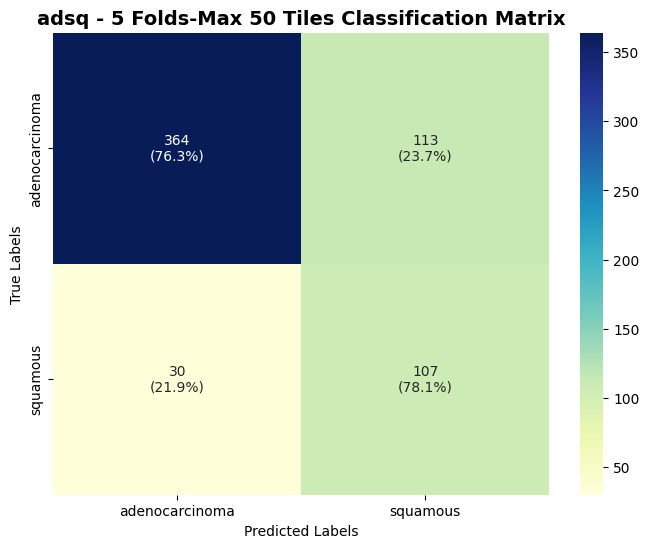

dict_values(['0.0', '1.0', '2.0'])


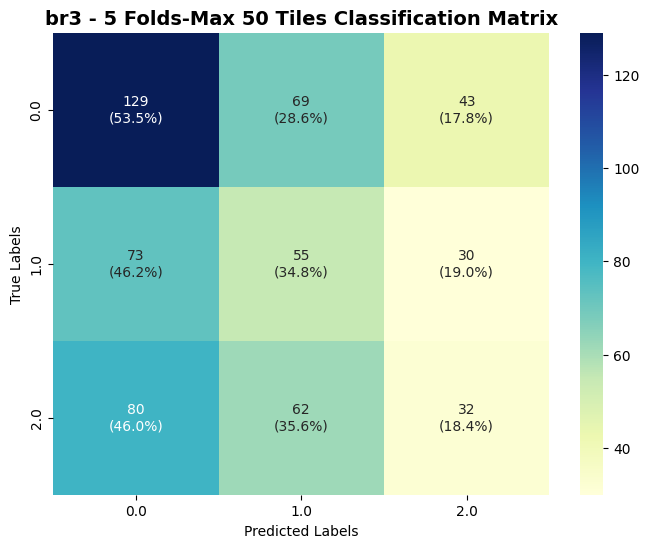

dict_values(['1-49 %', '< 1 %', '>=50 %'])


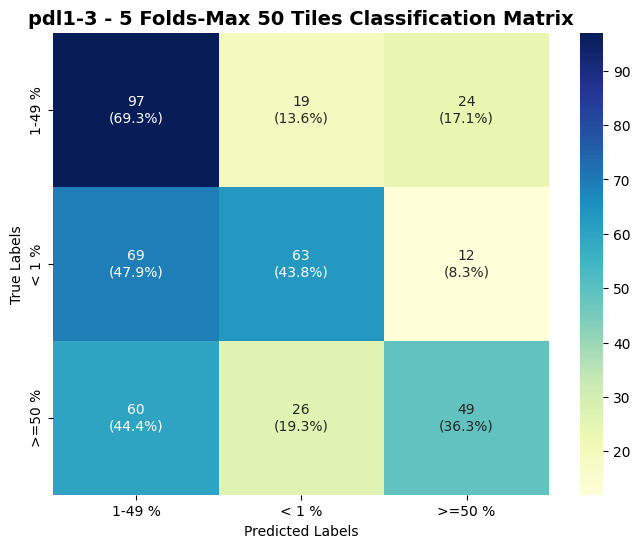

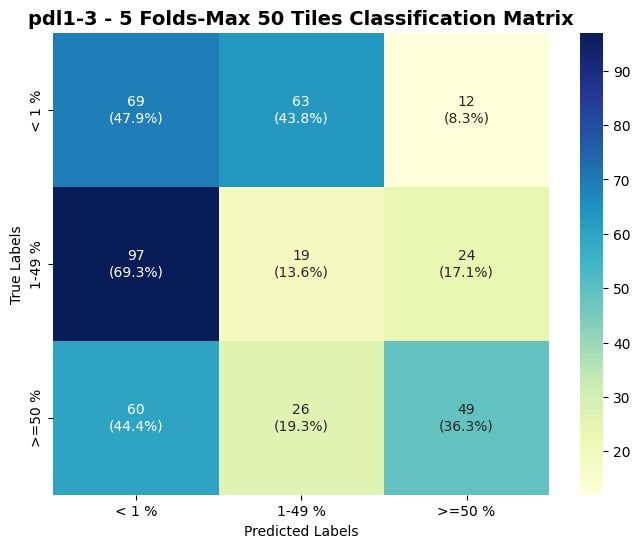

dict_values(['0-49 %', '>=50 %'])


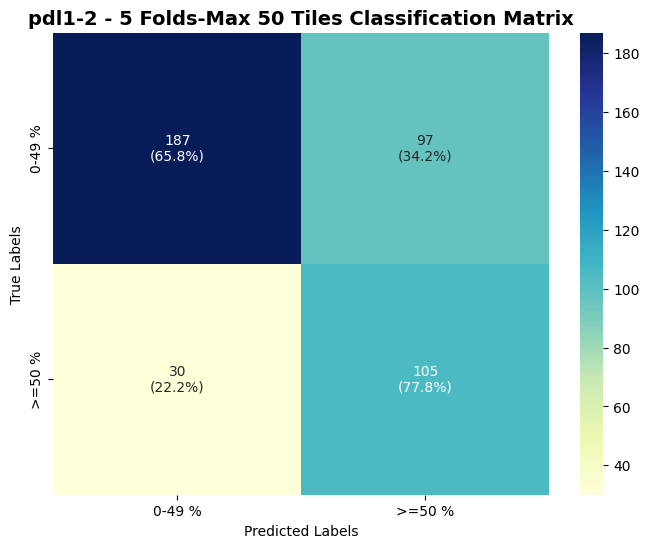

In [6]:
for i in intermediate_values:
    model, y_true, y_pred, outcome_labels = i

    print(outcome_labels)
    
    labels = [idx for idx, val in enumerate(sorted(set(outcome_labels)))]
    conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    conf_matrix = np.array(conf_matrix)
    plot_confusion_matrix_complex(conf_matrix, outcome_labels,  model, setup, working_directory = working_directory, cmap = "YlGnBu")


    if model == "pdl1-3":
        outcome_labels = np.array(list(outcome_labels))
        outcome_labels[0], outcome_labels[1] = outcome_labels[1], outcome_labels[0]

        conf_matrix[[0, 1]] = conf_matrix[[1, 0]]
        plot_confusion_matrix_complex(conf_matrix, outcome_labels,  model, setup, working_directory = working_directory, cmap = "YlGnBu")
    

In [7]:
"""conf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1,2])
conf_matrix = np.array(conf_matrix)
plot_confusion_matrix_complex(conf_matrix, outcome_labels,  m, "15 Folds", "YlGnBu")

outcome_labels = np.array(list(outcome_labels))
outcome_labels[0], outcome_labels[1] = outcome_labels[1], outcome_labels[0]

conf_matrix[[0, 1]] = conf_matrix[[1, 0]]
plot_confusion_matrix_complex(conf_matrix, outcome_labels,  m, "15 Folds", "YlGnBu")"""

'conf_matrix = confusion_matrix(y_true, y_pred, labels=[0,1,2])\nconf_matrix = np.array(conf_matrix)\nplot_confusion_matrix_complex(conf_matrix, outcome_labels,  m, "15 Folds", "YlGnBu")\n\noutcome_labels = np.array(list(outcome_labels))\noutcome_labels[0], outcome_labels[1] = outcome_labels[1], outcome_labels[0]\n\nconf_matrix[[0, 1]] = conf_matrix[[1, 0]]\nplot_confusion_matrix_complex(conf_matrix, outcome_labels,  m, "15 Folds", "YlGnBu")'

In [8]:
subfolder

['adsq', 'br3', 'pdl1-3', 'pdl1-2']

In [9]:
from re import sub

df_list = []

for i, m in zip(results, subfolder):
    transpose_df = i.T
    transpose_df = transpose_df.rename(columns={0: m})
    #display(transpose_df)
    transpose_df = transpose_df.reset_index()
    transpose_df.rename(columns={transpose_df.columns[0]: 'MyModel'}, inplace=True)

    df_list.append(transpose_df)




In [10]:
df_list[3]

,MyModel,pdl1-2
0,Dataset,test
1,Fold,25
2,Accuracy,0.696897
3,Balanced Accuracy,0.718114
4,Precision,0.751577
5,Recall,0.696897
6,F1_score,0.70676
7,0-49 %_precision,0.861751
8,0-49 %_recall,0.658451
9,0-49 %_f1-score,0.746507


In [11]:
result_df_1 = pd.concat([df_list[0]] , axis=1)
result_df_2 = pd.concat([df_list[1]] , axis=1)
result_df_3 = pd.concat([df_list[2]] , axis=1)
result_df_4 = pd.concat([df_list[3]] , axis=1)

In [12]:
with pd.ExcelWriter(file_name) as writer:
    result_df_1.to_excel(writer, sheet_name="Best Response 3", index=False)
    result_df_2.to_excel(writer, sheet_name="Adeno vs Squamous", index=False)
    result_df_3.to_excel(writer, sheet_name="PDL1 3 classes", index=False)
    result_df_4.to_excel(writer, sheet_name="PDL1 2 classes", index=False)

In [13]:
subfolder

['adsq', 'br3', 'pdl1-3', 'pdl1-2']

In [14]:
df_test_list[0]

,slide,y_true,y_pred
0,DIG_PAT_1696325152,0,0
1,DIG_PAT_1696325261,0,0
2,DIG_PAT_1696325298,0,1
3,DIG_PAT_1696325346,0,1
4,DIG_PAT_1696325458,0,0
...,...,...,...
609,DIG_PAT_1725901895,1,1
610,DIG_PAT_1725901924,1,1
611,DIG_PAT_1725901955,0,0
612,DIG_PAT_1725902645,1,1


In [15]:
df_test_list[2]

,slide,y_true,y_pred
0,DIG_PAT_1696325152,2,0.0
1,DIG_PAT_1696325261,0,0.0
2,DIG_PAT_1696325298,0,2.0
3,DIG_PAT_1696325346,0,0.0
4,DIG_PAT_1696325556,2,2.0
...,...,...,...
414,DIG_PAT_1725901798,1,1.0
415,DIG_PAT_1725901844,2,1.0
416,DIG_PAT_1725901870,0,2.0
417,DIG_PAT_1725901895,2,1.0


In [16]:
csv_df = pd.read_csv(f"{working_directory}/projects/I3lung-sqadqc-project/annotations.csv")

In [17]:
file_path = working_directory+"/data_config.json"

import json

# Open and read the JSON file
with open(file_path, "r") as file:
    data = json.load(file)  # Load JSON data into a Python dictionary or list

print(data)
data.keys()

{'models': ['adsq', 'br3', 'pdl1-3', 'pdl1-2'], 'labels': {'adsq': 'HISTOLOGY', 'br3': 'BEST_RESPONSE_3', 'pdl1-3': 'PDL1_CATHEGORY', 'pdl1-2': 'PDL1_BINARY'}, 'model_outdir': {'adsq': '/media/mmd/Samsung_T5/GitHub/UMD/projects/trained_models/adsq', 'br3': '/media/mmd/Samsung_T5/GitHub/UMD/projects/trained_models/br3', 'pdl1-3': '/media/mmd/Samsung_T5/GitHub/UMD/projects/trained_models/pdl1-3', 'pdl1-2': '/media/mmd/Samsung_T5/GitHub/UMD/projects/trained_models/pdl1-2'}, 'filter_adsq': {'HISTOLOGY': ['squamous', 'adenocarcinoma']}, 'filter_br3': {'BEST_RESPONSE_3': ['2.0', '1.0', '0.0']}, 'filter_pdl1-3': {'PDL1_CATHEGORY': ['1-49 %', '>=50 %', '< 1 %']}, 'filter_pdl1-2': {'PDL1_BINARY': ['0-49 %', '>=50 %']}}


dict_keys(['models', 'labels', 'model_outdir', 'filter_adsq', 'filter_br3', 'filter_pdl1-3', 'filter_pdl1-2'])

In [18]:
import json

In [19]:
labels = list(data["labels"].values())

In [20]:
labels

['HISTOLOGY', 'BEST_RESPONSE_3', 'PDL1_CATHEGORY', 'PDL1_BINARY']

In [21]:
from anyio import value
from pandas import value_counts

id_list_list = []

for i,l in zip(df_test_list, labels):
    df_joined = pd.merge(i, csv_df, on ='slide', how = 'left')
    selected_df = df_joined[["slide", l]]
    value_counts = selected_df[l].value_counts()
    df_counts = value_counts.to_frame(name="Count")
    df_counts["Percentage (%)"] = (df_counts["Count"] / df_counts["Count"].sum()) * 100

    #display(selected_df)
    print(selected_df[l].value_counts())
    display(df_counts)

        # Convertire la colonna "ID" in una lista
    id_list = df_joined["slide"].tolist()
    id_list = [i+".pt" for i in id_list]

    # Mostrare la lista risultante
    id_list_list.append(id_list)

HISTOLOGY
adenocarcinoma    477
squamous          137
Name: count, dtype: int64


,Count,Percentage (%)
HISTOLOGY,,
adenocarcinoma,477,77.687296
squamous,137,22.312704


BEST_RESPONSE_3
0.0    241
2.0    174
1.0    158
Name: count, dtype: int64


,Count,Percentage (%)
BEST_RESPONSE_3,,
0.0,241,42.059337
2.0,174,30.366492
1.0,158,27.574171


PDL1_CATHEGORY
< 1 %     144
1-49 %    140
>=50 %    135
Name: count, dtype: int64


,Count,Percentage (%)
PDL1_CATHEGORY,,
< 1 %,144,34.367542
1-49 %,140,33.412888
>=50 %,135,32.219570


PDL1_BINARY
0-49 %    284
>=50 %    135
Name: count, dtype: int64


,Count,Percentage (%)
PDL1_BINARY,,
0-49 %,284,67.78043
>=50 %,135,32.21957


In [22]:
# Aggiungere ".pt" a tutte le stringhe nella colonna "ID"
#df_joined["slide"] = df_joined["slide"] + ".pt"

In [23]:
import torch

In [24]:
shape_list_list = []
folder_path = "/media/mmd/Extreme SSD/work/bags/uni/full-qc/10x reinhard_fast"
for list_dir in id_list_list:
    shape_list = []
    for filename in os.listdir(folder_path):

        if filename in list_dir:
            file_path = os.path.join(folder_path, filename)
            
            # Load the PyTorch object
            data = torch.load(file_path)
            
            # If each .pt file stores a *single* tensor, print its shape
            if hasattr(data, 'shape'):
                #print(f"{filename} => shape: {tuple(data.shape)}")
                shape_list.append(data.shape[0])
            #else:
                # If data isn't a single tensor, just show what was loaded
                #print(f"{filename} => not a single tensor (type: {type(data)})")
    print(len(shape_list))
    shape_list_list.append(shape_list)


614
573
419
419


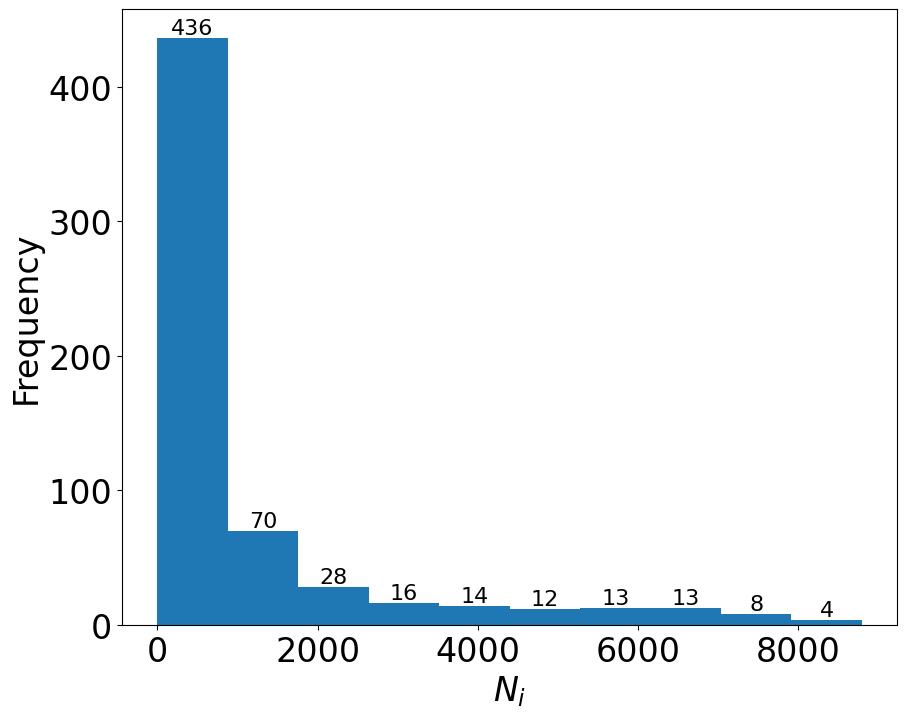

In [25]:
values = shape_list_list[0]
# Create the histogram
plt.figure(figsize=(10, 8))

n, bins, patches = plt.hist(values, bins=10)  # You can adjust 'bins' to change how many bars appear

#plt.xticks(bins)
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

# Annotate each bar with its count
for i, patch in enumerate(patches):
    # Find the center of each bin
    bin_center = (bins[i] + bins[i+1]) / 2
    
    # Label just above the top of each bar
    plt.text(bin_center, n[i], int(n[i]), 
             ha='center', va='bottom', )#fontsize=12)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# Add axis labels and a title
plt.xlabel("$N_i$", fontsize=24)
plt.ylabel("Frequency", fontsize = 24)
#plt.title("Histogram of Values")

# Display the plot
plt.savefig("histogram_tiles.png", transparent=True)
plt.show()